# PREGUNTA 1

DOFs libres: [2 3 4 5 6 7]
Reacciones (orden [v1,θ1, v2,θ2, ...]):
 [ 4.60000000e+04  5.10000000e+04 -7.27595761e-12  0.00000000e+00
  5.82076609e-11 -1.80202830e-11  7.27595761e-12  0.00000000e+00
  4.60000000e+04 -5.10000000e+04]

Nodo 1 (x=0.000 m) -> Rv=46000.00 N, M=51000.00 N·m
Nodo 5 (x=6.000 m) -> Rv=46000.00 N, M=-51000.00 N·m
Elem 1: V_i=46000.00 N, M_i=51000.00 N·m | V_j=-28000.00 N, M_j=4500.00 N·m
Elem 2: V_i=28000.00 N, M_i=-4500.00 N·m | V_j=-10000.00 N, M_j=33000.00 N·m
Elem 3: V_i=-10000.00 N, M_i=-33000.00 N·m | V_j=28000.00 N, M_j=4500.00 N·m
Elem 4: V_i=-28000.00 N, M_i=-4500.00 N·m | V_j=46000.00 N, M_j=-51000.00 N·m


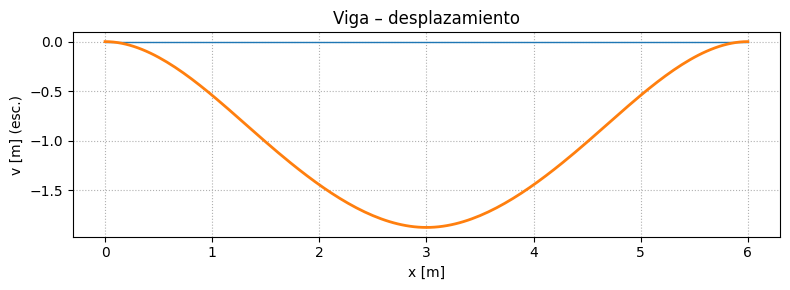

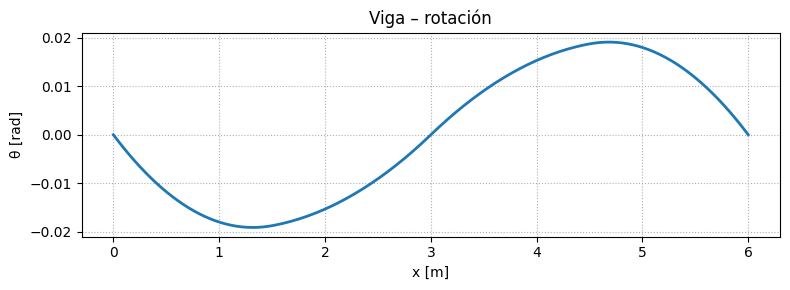

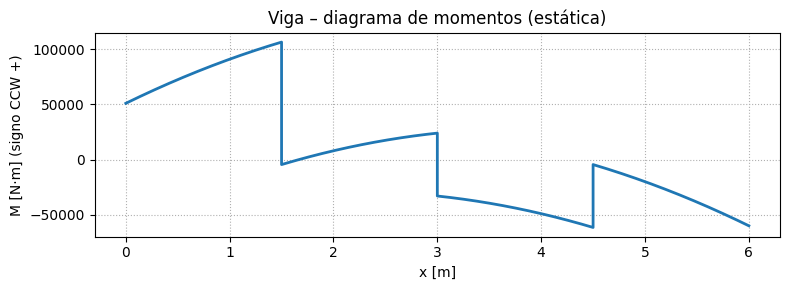

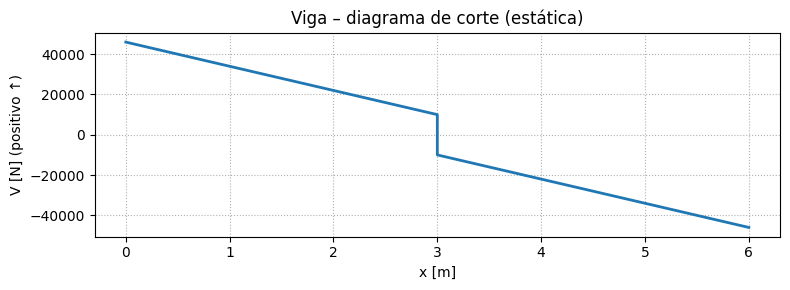

In [2]:
import numpy as np
from funciones import *

# ====== Parámetros del problema ======
L = 6.0         # [m]
E = 210e9       # [Pa]
I = 8.0e-6      # [m^4]
q = 12e3        # [N/m]  (↓) usar valor positivo hacia abajo
P = 20e3        # [N]    (↓) valor positivo hacia abajo

# Discretización (elije 2 para tener nodo en L/2 y aplicar P como nodal)
ne = 4

# ====== Malla ======
x, elems, Le = make_uniform_beam_mesh(L, ne)

# ====== Ensamble K y F ======
K, F = assemble_KF_beam(E, I, x, elems, q_uniform=q, pointloads=[(L/2, P)])

# ====== Condiciones de borde: empotramientos en x=0 y x=L ======
U, R, free, fixed = apply_fixed_ends_bc(K, F, N=x.size)

print("DOFs libres:", free)
print("Reacciones (orden [v1,θ1, v2,θ2, ...]):\n", R)
print()

for n in [0, x.size - 1]:
    print(f"Nodo {n+1} (x={x[n]:.3f} m) -> Rv={R[2*n]:.2f} N, M={R[2*n+1]:.2f} N·m")

# ====== Post-proceso: fuerzas de extremo por elemento (V, M) locales ======
for e, (i, j) in enumerate(elems):
    u_e = np.array([U[2*i], U[2*i+1], U[2*j], U[2*j+1]])
    s_loc = element_end_forces_local(E, I, x[j]-x[i], u_e, q_uniform=q)
    Vi, Mi, Vj, Mj = s_loc  # [Fv_i, M_i, Fv_j, M_j]
    print(f"Elem {e+1}: V_i={Vi:.2f} N, M_i={Mi:.2f} N·m | V_j={Vj:.2f} N, M_j={Mj:.2f} N·m")

# ====== Gráfico de deformada ======
plot_deflection(x, elems, U, scale=50.0, nper=40)
plot_rotation_beam(x, elems, U, nper=60)
plot_moment_beam(x, elems, U, E, I, q_uniform=q, nper=120)
plot_shear_beam(x, elems, U, E, I, q_uniform=q, nper=120)
